In [1]:
# import the necessary packages
import os
import sys
from astir.data import from_csv_yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
%matplotlib inline

# make sure that we are in the right directory
print(os.getcwd())

/mnt/scratch1/miniconda3/envs/astir/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/mnt/plummergrp/QuPath_0.4.4/BrCa


In [8]:
# set the paths for our files
filenames = ["session"]

expression_mat_paths = []
temp_mat_paths = []
yaml_marker_path = 'akoya_markers.yml'

for i in range(len(filenames)):
    expression_mat_paths.append('./'+filenames[i]+'_matrix.csv')
    temp_mat_paths.append('./'+filenames[i]+'_astir_matrix.csv')

    # perform an archsinh transform on the IMC data
    df = pd.read_csv(expression_mat_paths[i], index_col=0)
    cofactor = 5
    df_trans = np.arcsinh(df/cofactor)

    # save the dataframe as csv
    df_trans.to_csv(temp_mat_paths[i])

In [9]:
# load the data into astir
ast = []
for i in range(len(filenames)):
    ast.append(from_csv_yaml(temp_mat_paths[i], marker_yaml=yaml_marker_path))
    print(ast[i])

Astir object, 14 cell types, 3474157 cells


training restart (final):  10%|█         | 1/10 [295.89s/epochs, current loss: -366508546.5]


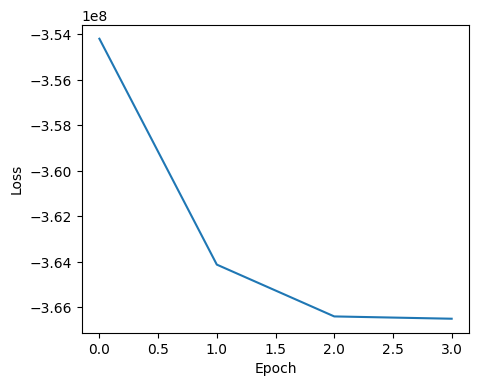

In [10]:
# fit the cell types
# fitting will stop once the change in loss falls below delta_loss
for i in range(len(filenames)):
    ast[i].fit_type(max_epochs=10, n_init=3, n_init_epochs=2)
    plt.figure(figsize=(5,4))
    plt.plot(np.arange(len(ast[i].get_type_losses())), ast[i].get_type_losses())
    plt.ylabel("Loss")
    plt.xlabel("Epoch")

<class 'pandas.core.frame.DataFrame'>
         Normal Epithelial cells  Tumor cells  Proliferating Tumor cells  \
0                   4.098533e-12     0.000315               2.981450e-15   
1                   1.751644e-11     0.001010               1.908330e-15   
2                   4.450388e-14     0.000095               3.513467e-17   
3                   3.047266e-08     0.002015               2.578903e-18   
4                   8.957414e-09     0.000021               4.811530e-19   
...                          ...          ...                        ...   
3474152             1.068712e-03     0.000016               1.572279e-17   
3474153             4.823811e-04     0.000009               8.482163e-18   
3474154             1.430874e-02     0.000031               3.251876e-18   
3474155             3.344136e-01     0.000032               4.304572e-21   
3474156             4.592701e-01     0.000026               1.282793e-20   

         Myoepithelial cells  Granulocytes  Teloc

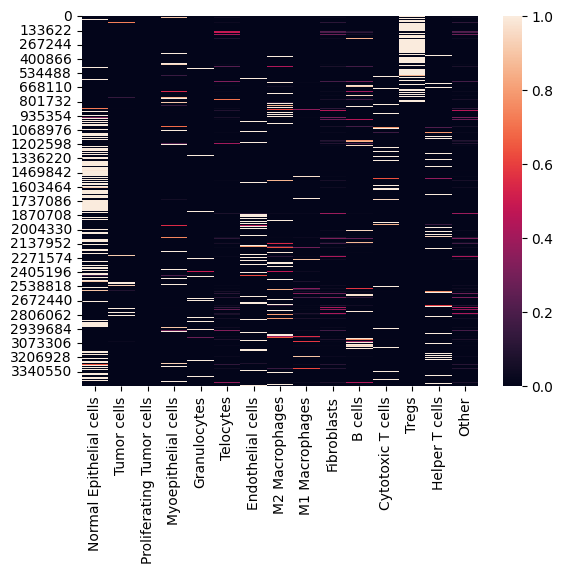

In [11]:
# assign the cell types
assignments = []
for i in range(len(filenames)):
    assignments.append(ast[i].get_celltype_probabilities())
    print(type(assignments[i]))
    print(assignments[i])
    sns.heatmap(assignments[i])
    print(ast[i].get_celltypes())
    ast[i].diagnostics_celltype().head(n=10)

In [12]:
# save the cell types
for i in range(len(filenames)):
    ast[i].type_to_csv('./'+filenames[i]+'_cell-types.csv')
    assignments[i].to_csv('./'+filenames[i]+'_cell-probs.csv')